In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import model
import torch

In [8]:
from train_reaction_model import *
# set hyperparameters
params = Reaction_diffusion_param(1)
NN_params = NN_param(1, 32, 10)
model_random = SimpleModel(params, NN_params)
model_pretrained = SimpleModel(params, NN_params)
# model_dict = torch.load('/home/shiqi/code/Project3-adaptive-combination/toy-model2/outputs/experiment1/model.pth')
model_dict = torch.load('/home/shiqi/code/Project3-adaptive-combination/toy-model2/model_pretrain.pth')
model_pretrained.load_state_dict(model_dict)
model_2stagepretrained = SimpleModel(params, NN_params)
# model_dict2 = torch.load('/home/shiqi/code/Project3-adaptive-combination/toy-model2/outputs/experiment2/model_2stage_pretrain.pth')
model_dict2 = torch.load('/home/shiqi/code/Project3-adaptive-combination/toy-model2/model_2stagepretrain.pth')
model_pretrained.load_state_dict(model_dict2)
model_random.eval()
model_pretrained.eval()
model_2stagepretrained.eval()

SimpleModel(
  (NN): TwoLayerNN(
    (hidden): Linear(in_features=1, out_features=32, bias=True)
    (output): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [9]:
# Load Data
# Generate training data and validation data
data_model = model.reaction_diffusion_equation()
train_dataset = torch.load('train_dataset.pth')
test_dataset = torch.load('test_dataset.pth')
# train_dataset = data_model.generate_training_data(1000,50)
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)
# test_dataset = data_model.generate_training_data(1000,50)
test_loader = DataLoader(test_dataset,  batch_size=len(train_dataset), shuffle=True)


In [10]:
# torch.save(train_dataset, 'train_dataset.pth')
# torch.save(test_dataset, 'test_dataset.pth')

In [71]:
for batch in train_loader:
    x_train, y_train, lace_train = batch
    break
for batch in test_loader:
    x_test, y_test, lace_test = batch
    break



g_train, h_pretrained_train = model_pretrained(x_train, lace_train)
g_train, h_random_train = model_random(x_train, lace_train)
g_test, h_pretrained_test = model_pretrained(x_test, lace_test)
g_test, h_random_test = model_random(x_test, lace_test)
g_train, h_2stagepretrained_train = model_2stagepretrained(x_train, lace_train)
g_test, h_2stagepretrained_test = model_2stagepretrained(x_test, lace_test)


In [72]:
# loss_terminal_pretrained_train = terminal_loss_ver2(g_train, h_pretrained_train, y_train)
# loss_terminal_random_train = terminal_loss_ver2(g_train, h_random_train, y_train)
# loss_terminal_pretrained_test = terminal_loss_ver2(g_test, h_pretrained_test, y_test)
# loss_terminal_random_test = terminal_loss_ver2(g_test, h_random_test, y_test)
# loss_terminal_2stagepretrained_train = terminal_loss_ver2(g_train, h_2stagepretrained_train, y_train)
# loss_terminal_2stagepretrained_test = terminal_loss_ver2(g_test, h_2stagepretrained_test, y_test)
# print('Loss: Terminal Pretrained Train: ', loss_terminal_pretrained_train)
# print('Loss: Terminal Pretrained Test: ', loss_terminal_pretrained_test)
# print('Loss: Terminal Random Train: ', loss_terminal_random_train)
# print('Loss: Terminal Random Test: ', loss_terminal_random_test)
# print('Loss: Terminal 2StagePretrained Train: ', loss_terminal_2stagepretrained_train)
# print('Loss: Terminal 2StagePretrained Test: ', loss_terminal_2stagepretrained_test)



In [73]:
loss_terminal_pretrained_train = terminal_loss_ver2(g_train, h_pretrained_train, y_train - x_train)
loss_terminal_random_train = terminal_loss_ver2(g_train, h_random_train, y_train - x_train)
loss_terminal_pretrained_test = terminal_loss_ver2(g_test, h_pretrained_test, y_test - x_test)
loss_terminal_random_test = terminal_loss_ver2(g_test, h_random_test, y_test - x_test)
loss_terminal_2stagepretrained_train = terminal_loss_ver2(g_train, h_2stagepretrained_train, y_train - x_train)
loss_terminal_2stagepretrained_test = terminal_loss_ver2(g_test, h_2stagepretrained_test, y_test - x_test)

print('Loss: Terminal Pretrained Train: ', loss_terminal_pretrained_train)
print('Loss: Terminal Pretrained Test: ', loss_terminal_pretrained_test)
print('Loss: Terminal Random Train: ', loss_terminal_random_train)
print('Loss: Terminal Random Test: ', loss_terminal_random_test)
print('Loss: Terminal 2StagePretrained Train: ', loss_terminal_2stagepretrained_train)
print('Loss: Terminal 2StagePretrained Test: ', loss_terminal_2stagepretrained_test)


Loss: Terminal Pretrained Train:  tensor(1.5946e-08, grad_fn=<MseLossBackward0>)
Loss: Terminal Pretrained Test:  tensor(1.6231e-08, grad_fn=<MseLossBackward0>)
Loss: Terminal Random Train:  tensor(8.5553e-07, grad_fn=<MseLossBackward0>)
Loss: Terminal Random Test:  tensor(8.5643e-07, grad_fn=<MseLossBackward0>)
Loss: Terminal 2StagePretrained Train:  tensor(4.1963e-08, grad_fn=<MseLossBackward0>)
Loss: Terminal 2StagePretrained Test:  tensor(4.2324e-08, grad_fn=<MseLossBackward0>)


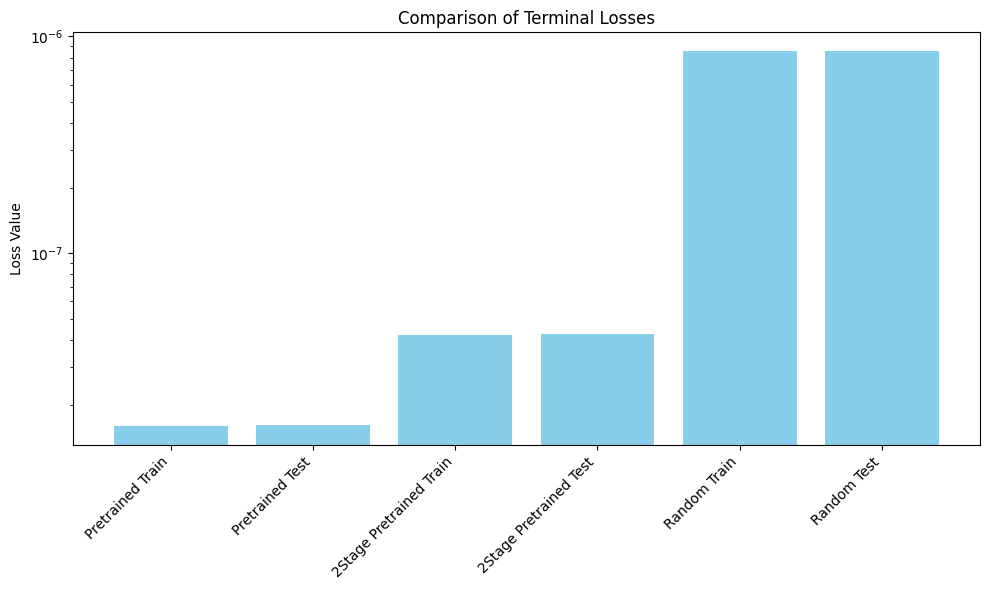

In [167]:
labels = [
    'Pretrained Train', 
    'Pretrained Test', 
    '2Stage Pretrained Train', 
    '2Stage Pretrained Test',
    'Random Train', 
    'Random Test'
]
loss_values = [
    loss_terminal_pretrained_train.item(), 
    loss_terminal_pretrained_test.item(),
    loss_terminal_2stagepretrained_train.item(), 
    loss_terminal_2stagepretrained_test.item(),
    loss_terminal_random_train.item(), 
    loss_terminal_random_test.item()
    
]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, loss_values, color='skyblue')
plt.ylabel('Loss Value')
plt.title('Comparison of Terminal Losses')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.tight_layout()

# Display the plot
plt.show()

In [74]:
loss_orthogonal_pretrained_train = orthogonal_loss_ver2(g_train, h_pretrained_train)
loss_orthogonal_random_train = orthogonal_loss_ver2(g_train, h_random_train)
loss_orthogonal_pretrained_test = orthogonal_loss_ver2(g_test, h_pretrained_test)
loss_orthogonal_random_test = orthogonal_loss_ver2(g_test, h_random_test)
loss_orthogonal_2stagepretrained_train = orthogonal_loss_ver2(g_train, h_2stagepretrained_train)
loss_orthogonal_2stagepretrained_test = orthogonal_loss_ver2(g_test, h_2stagepretrained_test)
print('Loss: Orthogonal Pretrained Train: ', loss_orthogonal_pretrained_train)
print('Loss: Orthogonal Pretrained Test: ', loss_orthogonal_pretrained_test)
print('Loss: Orthogonal Random Train: ', loss_orthogonal_random_train)
print('Loss: Orthogonal Random Test: ', loss_orthogonal_random_test)
print('Loss: Orthogonal 2StagePretrained Train: ', loss_orthogonal_2stagepretrained_train)
print('Loss: Orthogonal 2StagePretrained Test: ', loss_orthogonal_2stagepretrained_test)

Loss: Orthogonal Pretrained Train:  tensor(0.1513, grad_fn=<MaxBackward1>)
Loss: Orthogonal Pretrained Test:  tensor(0.1513, grad_fn=<MaxBackward1>)
Loss: Orthogonal Random Train:  tensor(0.3402, grad_fn=<MaxBackward1>)
Loss: Orthogonal Random Test:  tensor(0.3394, grad_fn=<MaxBackward1>)
Loss: Orthogonal 2StagePretrained Train:  tensor(0.3242, grad_fn=<MaxBackward1>)
Loss: Orthogonal 2StagePretrained Test:  tensor(0.3234, grad_fn=<MaxBackward1>)


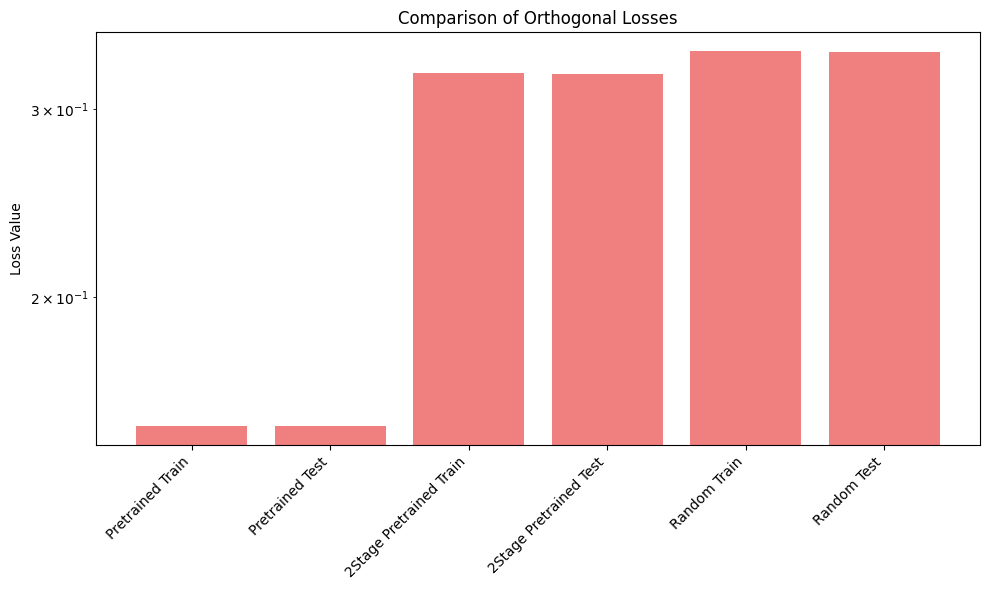

In [181]:


# Updated labels and values for the bar chart
labels = [
    'Pretrained Train', 
    'Pretrained Test', 
    '2Stage Pretrained Train', 
    '2Stage Pretrained Test',
    'Random Train', 
    'Random Test'
]
loss_values = [
    loss_orthogonal_pretrained_train.item(), 
    loss_orthogonal_pretrained_test.item(),
    loss_orthogonal_2stagepretrained_train.item(), 
    loss_orthogonal_2stagepretrained_test.item(),
    loss_orthogonal_random_train.item(), 
    loss_orthogonal_random_test.item()
]

# Plotting the bar chart with a different color
plt.figure(figsize=(10, 6))
plt.bar(labels, loss_values, color='lightcoral')
plt.ylabel('Loss Value')
plt.yscale('log')
plt.title('Comparison of Orthogonal Losses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


In [75]:
# import torch.nn.functional as F

# def iterative_training(model, x, y, lace, iterations=10):
#     g, h = model(x, lace)
#     gh = torch.cat((g, h), 1)
#     gh_orthogonal = gram_schmidt(gh)
    
#     # 计算初始 coeffs
#     coeffs, _, _, _ = torch.linalg.lstsq(gh_orthogonal, y)
#     y_proj = torch.matmul(gh_orthogonal, coeffs)

#     # print(y_proj - y)

#     err = y
#     # print(err)
#     params = Reaction_diffusion_param()
#     model.set_params(params)
    


#     errors_from_projection = []
#     errors_from_data = []
#     k_list = []

#     y_pred = model.forward_y(x, lace) - x
#     error_from_projection = torch.norm(y_pred - y_proj, p=float('inf'))
#     error_from_data = torch.norm(y_pred - y, p=float('inf'))
#     errors_from_projection.append(error_from_projection.item())
#     errors_from_data.append(error_from_data.item())
#     k_list.append(params.k)

#     lambda_reg = 1e-4  # 正则化系数，根据实际情况调整
#     HTH = torch.matmul(h.T, h) + lambda_reg * torch.eye(h.shape[1], device=h.device)
#     HTH_inv = torch.inverse(HTH)
 

#     for iter in range(iterations):
#         g, h = model(x, lace)
#         coeffs, _, _, _ = torch.linalg.lstsq(g, err)
#         coeffs = coeffs.squeeze()

#         # 更新模型的参数
#         params.k = coeffs
#         model.set_params(params)
#         k_list.append(params.k)

#         # 更新误差
#         g, h = model(x, lace)
#         err = y - g * params.k
#         # print(err)

#         # 更新线性层的参数
#         Lambda = torch.matmul(HTH_inv, torch.matmul(h.T, err))
#         params.linear_layer = Lambda
#         model.set_params(params)

#         # 计算新的误差
#         err = y - h @ Lambda

#         # 计算预测值和误差
#         y_pred = model.forward_y(x, lace) - x
#         # print(y_pred)
#         # print(y)
#         # # print(model.params.k, model.params.linear_layer)
#         # # print(params.k, params.linear_layer)
#         # print(err - g * params.k - (y-y_pred))
#         # print(y - y_pred)
#         error_from_projection = torch.norm(y_pred - y_proj, p=float('inf'))
#         error_from_data = torch.norm(y_pred - y, p=float('inf'))

#         errors_from_projection.append(error_from_projection.item())
#         errors_from_data.append(error_from_data.item())
#         # break

#     return errors_from_projection, errors_from_data, k_list


In [175]:
import torch.nn.functional as F

def iterative_training(model, x, y, lace, iterations=10):
    g, h = model(x, lace)
    gh = torch.cat((g, h), 1)
    gh_orthogonal = gram_schmidt(gh)
    
    # 计算初始 coeffs
    coeffs, _, _, _ = torch.linalg.lstsq(gh_orthogonal, y - x)
    y_proj = torch.matmul(gh_orthogonal, coeffs) + x

    # print(y_proj - y)

    err = y - x
    # print(err)
    params = Reaction_diffusion_param()
    model.set_params(params)
    


    errors_from_projection = []
    errors_from_data = []
    k_list = []

    # lambda_reg = 1e-3  # 正则化系数，根据实际情况调整
    # # print(h)
    # HTH = torch.matmul(h.T, h) + lambda_reg * torch.eye(h.shape[1], device=h.device)
    # HTH_inv = torch.inverse(HTH)
    # print(HTH_inv @ HTH)

    y_pred = model.forward_y(x, lace)
    error_from_projection = torch.norm(y_pred - y_proj, p=2)
    error_from_data = torch.norm(y_pred - y, p=2)
    errors_from_projection.append(error_from_projection.item())
    errors_from_data.append(error_from_data.item())
    k_list.append(params.k)

    g, h = model(x, lace)
    g = g.detach()
    h = h.detach()

    for iter in range(iterations):
        
        coeffs, _, _, _ = torch.linalg.lstsq(g, err)
        coeffs = coeffs.squeeze()

        # 更新模型的参数
        params.k = coeffs
        model.set_params(params)
        k_list.append(params.k)

        # 更新误差
        err = y - x - g * params.k
        err = err.detach()
        # print(err)

        # 更新线性层的参数
        
        # # print(HTH_inv.shape)
        # Lambda = torch.matmul(HTH_inv, torch.matmul(h.T, err))
        # params.linear_layer = Lambda

        Lambda = torch.nn.Parameter(torch.zeros(h.shape[1], err.shape[1]))
        optimizer = torch.optim.Adam([Lambda], lr=0.001)
        for i in range(100):
            optimizer.zero_grad()
            loss = torch.norm(err - h @ Lambda, p=2)
            loss.backward()
            optimizer.step()
        params.linear_layer = Lambda.detach()

        model.set_params(params)

        # 计算新的误差
        err = y - x - h @ Lambda
        err = err.detach()

        # 计算预测值和误差
        y_pred = model.forward_y(x, lace)
        # print(y_pred)
        # print(y)
        # # print(model.params.k, model.params.linear_layer)
        # # print(params.k, params.linear_layer)
        # print(err - g * params.k - (y-y_pred))
        # print(y - y_pred)
        error_from_projection = torch.norm(y_pred - y_proj, p=2)
        error_from_data = torch.norm(y_pred - y, p=2)

        errors_from_projection.append(error_from_projection.item())
        errors_from_data.append(error_from_data.item())
        # break

    return errors_from_projection, errors_from_data, k_list


In [176]:
errors_from_projection_pretrained_train, errors_from_data_pretrained_train, k_list_pretrained = iterative_training(model_pretrained, x_train, y_train, lace_train, iterations=20)

In [177]:
print('Errors from projection Pretrained Train: ', errors_from_projection_pretrained_train)
print('Errors from data Pretrained Train: ', errors_from_data_pretrained_train)

Errors from projection Pretrained Train:  [11.595788955688477, 6.8963165283203125, 4.001149654388428, 2.520261287689209, 1.8183950185775757, 1.5119187831878662, 1.3906137943267822, 1.3389126062393188, 1.3188996315002441, 1.310961365699768, 1.3075042963027954, 1.3061821460723877, 1.3052470684051514, 1.304707646369934, 1.304473638534546, 1.3043243885040283, 1.3051376342773438, 1.3045915365219116, 1.3043981790542603, 1.3042339086532593, 1.3041210174560547]
Errors from data Pretrained Train:  [11.598087310791016, 6.901765823364258, 4.005775451660156, 2.525411605834961, 1.823530912399292, 1.5167790651321411, 1.3949568271636963, 1.342882513999939, 1.3231910467147827, 1.3143653869628906, 1.3113501071929932, 1.3095593452453613, 1.3086012601852417, 1.308203935623169, 1.3080368041992188, 1.3079129457473755, 1.3084763288497925, 1.308090090751648, 1.307951807975769, 1.3078845739364624, 1.3077824115753174]


In [178]:
errors_from_prejection_random_train, errors_from_data_random_train, k_list_random = iterative_training(model_random, x_train, y_train, lace_train, iterations=20)
print('Errors from projection Random Train: ', errors_from_prejection_random_train)
print('Errors from data Random Train: ', errors_from_data_random_train)

Errors from projection Random Train:  [11.575098991394043, 7.398002624511719, 4.355933666229248, 2.7332024574279785, 1.945817470550537, 1.6402307748794556, 1.5499259233474731, 1.5256569385528564, 1.5189493894577026, 1.5166159868240356, 1.5157575607299805, 1.515684723854065, 1.515622615814209, 1.515542984008789, 1.5155378580093384, 1.5155372619628906, 1.5155377388000488, 1.5178829431533813, 1.5163240432739258, 1.5158230066299438, 1.515686273574829]
Errors from data Random Train:  [11.598087310791016, 7.443459987640381, 4.439548492431641, 2.8678293228149414, 2.133028268814087, 1.8598051071166992, 1.7812587022781372, 1.7607368230819702, 1.7546437978744507, 1.7523679733276367, 1.7519416809082031, 1.7516149282455444, 1.7515778541564941, 1.751482367515564, 1.7514780759811401, 1.7514772415161133, 1.7514779567718506, 1.7537537813186646, 1.752280592918396, 1.7517963647842407, 1.7516084909439087]


In [179]:
errors_from_data_2stagepretrained_train, errors_from_projection_2stagepretrained_train, k_list_2stagepretrained = iterative_training(model_2stagepretrained, x_train, y_train, lace_train, iterations=20)
print('Errors from projection 2StagePretrained Train: ', errors_from_projection_2stagepretrained_train)
print('Errors from data 2StagePretrained Train: ', errors_from_data_2stagepretrained_train)

Errors from projection 2StagePretrained Train:  [11.598087310791016, 7.302901744842529, 4.418873310089111, 2.9877796173095703, 2.382378339767456, 2.16819429397583, 2.1027824878692627, 2.08441424369812, 2.0775153636932373, 2.0756900310516357, 2.075174331665039, 2.0750885009765625, 2.0748462677001953, 2.0747084617614746, 2.0751516819000244, 2.075061798095703, 2.0750741958618164, 2.075056314468384, 2.07502818107605, 2.0750224590301514, 2.0750205516815186]
Errors from data 2StagePretrained Train:  [11.600582122802734, 7.307340145111084, 4.419702529907227, 2.9846348762512207, 2.375765562057495, 2.1580820083618164, 2.091526508331299, 2.073225975036621, 2.0656912326812744, 2.0636301040649414, 2.062934160232544, 2.062796115875244, 2.063009738922119, 2.0625805854797363, 2.0626943111419678, 2.0623583793640137, 2.0623068809509277, 2.062277317047119, 2.0623605251312256, 2.0623526573181152, 2.062349319458008]


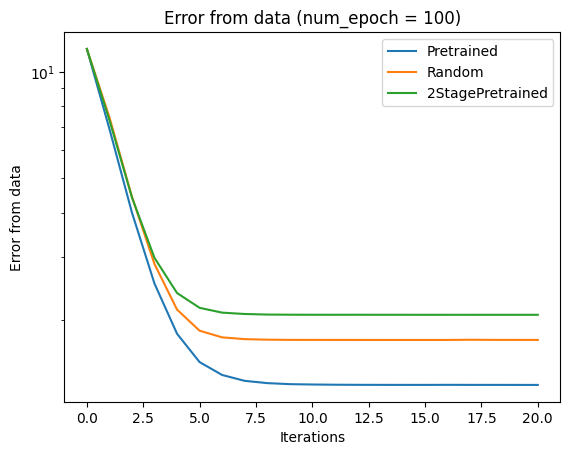

In [180]:
import matplotlib.pyplot as plt
plt.plot(errors_from_data_pretrained_train, label='Pretrained')
plt.plot(errors_from_data_random_train, label='Random')
plt.plot(errors_from_data_2stagepretrained_train, label='2StagePretrained')
plt.xlabel('Iterations')
plt.ylabel('Error from data')
plt.yscale('log')
plt.title('Error from data (num_epoch = 100)')
plt.legend()
plt.show()

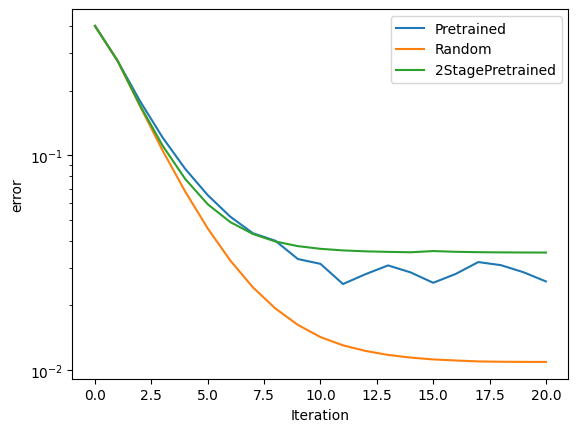

In [152]:
plt.plot([np.abs(k.detach().numpy() - 0.4) for k in k_list_pretrained], label='Pretrained')
plt.plot([np.abs(k.detach().numpy() - 0.4) for k in k_list_random], label='Random')
plt.plot([np.abs(k.detach().numpy() - 0.4) for k in k_list_2stagepretrained], label='2StagePretrained')
plt.xlabel('Iteration')
plt.ylabel('error')
plt.yscale('log')
plt.legend()
plt.show()


In [153]:
print(lace_train)

tensor([[ 0.0553],
        [ 0.0175],
        [ 0.0084],
        ...,
        [ 0.0175],
        [ 0.0175],
        [-0.0039]])


In [154]:
k_list_2stagepretrained

[tensor(0),
 tensor(0.1246),
 tensor(0.2294),
 tensor(0.2892),
 tensor(0.3224),
 tensor(0.3409),
 tensor(0.3512),
 tensor(0.3570),
 tensor(0.3603),
 tensor(0.3623),
 tensor(0.3633),
 tensor(0.3639),
 tensor(0.3643),
 tensor(0.3645),
 tensor(0.3647),
 tensor(0.3642),
 tensor(0.3645),
 tensor(0.3646),
 tensor(0.3647),
 tensor(0.3647),
 tensor(0.3648)]